I calculated correlation functions over the weekend; this notebook is going to plot them from the stored data.

In [1]:
import numpy as np
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

In [2]:
from itertools import cycle
from collections import defaultdict
colors = cycle(sns.color_palette())

In [3]:
outputdir = '/u/ki/swmclau2/des/HODOutput/'
#sim = 'fox'
simnames = ['emu', 'fox', 'multidark_highres', 'multidark']
#scale_factors = [0.25,0.333,0.5,  0.540541, 0.588235, 0.645161, 0.714286, 0.8, 0.909091, 1.0 ] #sf of emu and fox
sf = {sim: 1.0 for sim in simnames}
sf['multidark_highres'] = 1.001
data = defaultdict(list)

#for sf in scale_factors:
for sim in simnames:
    data[sim].append( np.loadtxt(outputdir+'%s/xi_all_%.3f.npy'%(sim,sf[sim])) )
    data[sim].append( np.loadtxt(outputdir+'%s/xi_1h_%.3f.npy'%(sim,sf[sim]))  )
    data[sim].append( np.loadtxt(outputdir+'%s/xi_2h_%.3f.npy'%(sim,sf[sim]))  )
    data[sim].append( np.loadtxt(outputdir+'%s/wp_all_%.3f.npy'%(sim,sf[sim])) )

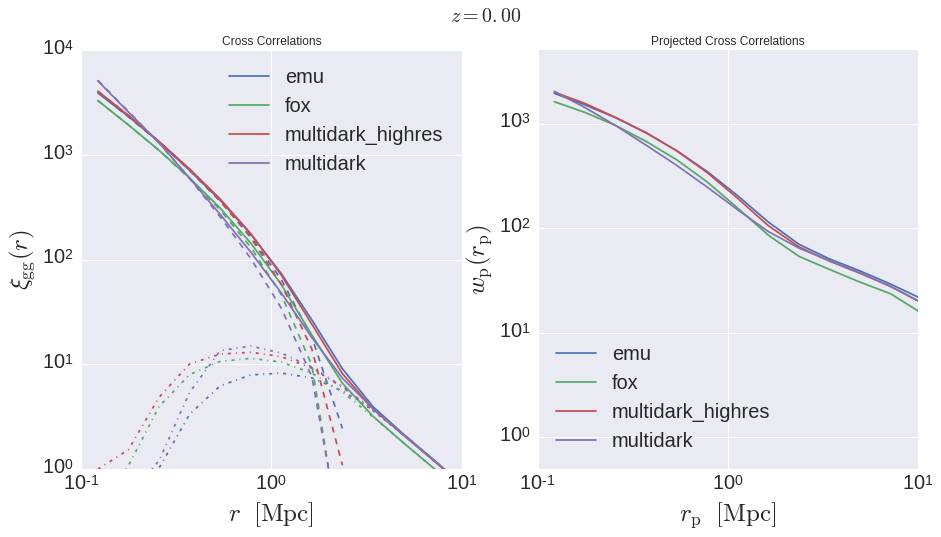

In [4]:
rbins = np.logspace(-1, 1.25, 15)
rbin_centers = (rbins[1:]+rbins[:-1])/2
fig = plt.figure(figsize = (15, 7.5))
#for sf, color in zip(scale_factors, colors):
for sim, color in zip(simnames, colors):
    plt.subplot(121)
    rz = 1.0/sf[sim] -1 
    plt.plot(rbin_centers, data[sim][0],
             #label='$z = %.2f$'%rz, color=color)
             label = sim, color = color)
    plt.plot(rbin_centers, data[sim][1], ls = '--', color = color)
    plt.plot(rbin_centers, data[sim][2], ls = '-.', color = color)

    plt.subplot(122)
    plt.plot(rbin_centers, data[sim][3],
             #label='$z = %.2f$'%rz,
             label = sim,
             color= color )
    
plt.subplot(121)
plt.title('Cross Correlations')
plt.xlim(xmin = 0.1, xmax = 10)
plt.ylim(ymin = 1, ymax = 1e4)
plt.loglog()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel(r'$r $  $\rm{[Mpc]}$', fontsize=25)
plt.ylabel(r'$\xi_{\rm gg}(r)$', fontsize=25)
plt.legend(loc='best', fontsize=20)

plt.subplot(122)
plt.title('Projected Cross Correlations')
plt.xlim(xmin = 0.1, xmax = 10)
plt.ylim(ymin = 0.5, ymax = 5e3)
plt.loglog()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel(r'$r_{\rm p} $  $\rm{[Mpc]}$', fontsize=25)
plt.ylabel(r'$w_{\rm p}(r_{\rm p})$', fontsize=25)
plt.legend(loc='best', fontsize=20)

plt.suptitle('$z = %.2f$'%rz, fontsize = 20)
plt.show()

In [5]:
outputdir = '/u/ki/swmclau2/des/HODOutput/'
sim = 'chinchilla'
boxsize_npart = [(125.0, 1024),(125.0, 2048), (250.0, 1024), (250.0, 128), (250.0, 196), (250.0, 2048),
                (250.0, 2560), (250.0, 320), (250.0, 512), (250.0, 768), (250.0, 85), (400.0, 1024),
                (400.0, 136), (400.0, 2048), (400.0, 210), (400.0, 315), (400.0, 512), (400.0, 768)]
a = 1.0
data = defaultdict(list)
version_names = []

for boxsize, npart in boxsize_npart:
#for sim in simnames:
    vn = 'Lb%d-%d'%(int(boxsize),npart )
    version_names.append(vn)
    data[vn].append( np.loadtxt(outputdir+'%s/%s/xi_all_%.3f.npy'%(sim,vn,a)) )
    data[vn].append( np.loadtxt(outputdir+'%s/%s/xi_1h_%.3f.npy'%(sim,vn,a))  )
    data[vn].append( np.loadtxt(outputdir+'%s/%s/xi_2h_%.3f.npy'%(sim,vn,a))  )
    data[vn].append( np.loadtxt(outputdir+'%s/%s/wp_all_%.3f.npy'%(sim,vn,a)) )

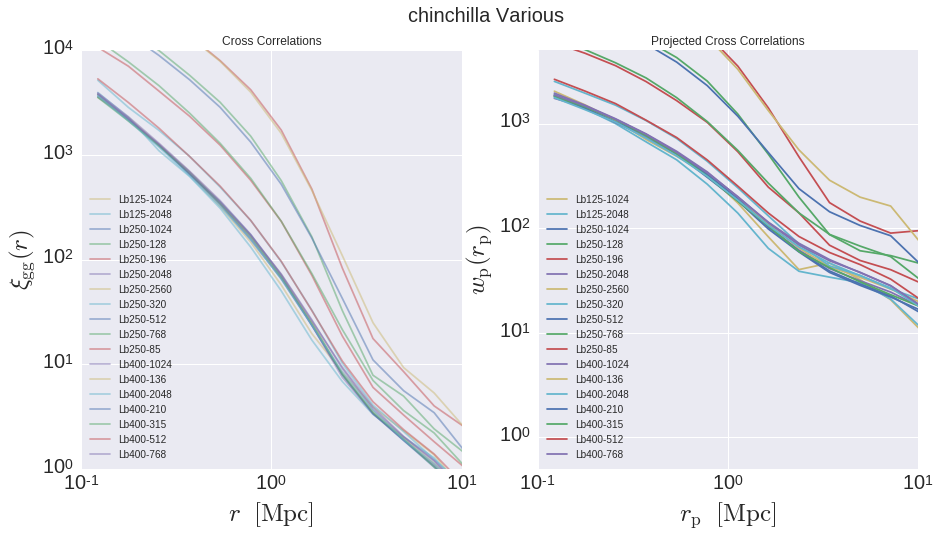

In [6]:
rbins = np.logspace(-1, 1.25, 15)
rbin_centers = (rbins[1:]+rbins[:-1])/2
fig = plt.figure(figsize = (15, 7.5))
for vn, color in zip(version_names, colors):
#for sim, color in zip(simnames, colors):
    plt.subplot(121)
    rz = 1.0/a -1 
    plt.plot(rbin_centers, data[vn][0], alpha = .5,
             label=vn, color=color)
             #label = sim, color = color)
    #plt.plot(rbin_centers, data[vn][1], ls = '--', color = color)
    #plt.plot(rbin_centers, data[vn][2], ls = '-.', color = color)

    plt.subplot(122)
    plt.plot(rbin_centers, data[vn][3],
             label=vn,
             #label = sim,
             color= color )
    
plt.subplot(121)
plt.title('Cross Correlations')
plt.xlim(xmin = 0.1, xmax = 10)
plt.ylim(ymin = 1, ymax = 1e4)
plt.loglog()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel(r'$r $  $\rm{[Mpc]}$', fontsize=25)
plt.ylabel(r'$\xi_{\rm gg}(r)$', fontsize=25)
plt.legend(loc='best', fontsize=10)

plt.subplot(122)
plt.title('Projected Cross Correlations')
plt.xlim(xmin = 0.1, xmax = 10)
plt.ylim(ymin = 0.5, ymax = 5e3)
plt.loglog()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel(r'$r_{\rm p} $  $\rm{[Mpc]}$', fontsize=25)
plt.ylabel(r'$w_{\rm p}(r_{\rm p})$', fontsize=25)
plt.legend(loc='best', fontsize=10)

plt.suptitle(sim + ' Various', fontsize = 20)
plt.show()